In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def getAndParseURL(url):
    result=requests.get(url,headers={"User-Agent":"Chrome/111.0.5563.65"})
    soup=bts(result.text,"html.parser")
    return soup

In [25]:
pages=["https://www.spotahome.com/s/brussels/for-rent:apartments/for-rent:studios"]
for page in range(2,103):
    pages.append("https://www.spotahome.com/s/brussels/for-rent:apartments/for-rent:studios/page:" +str (page))
    
pages

['https://www.spotahome.com/s/brussels/for-rent:apartments/for-rent:studios',
 'https://www.spotahome.com/s/brussels/for-rent:apartments/for-rent:studios/page:2',
 'https://www.spotahome.com/s/brussels/for-rent:apartments/for-rent:studios/page:3',
 'https://www.spotahome.com/s/brussels/for-rent:apartments/for-rent:studios/page:4',
 'https://www.spotahome.com/s/brussels/for-rent:apartments/for-rent:studios/page:5',
 'https://www.spotahome.com/s/brussels/for-rent:apartments/for-rent:studios/page:6',
 'https://www.spotahome.com/s/brussels/for-rent:apartments/for-rent:studios/page:7',
 'https://www.spotahome.com/s/brussels/for-rent:apartments/for-rent:studios/page:8',
 'https://www.spotahome.com/s/brussels/for-rent:apartments/for-rent:studios/page:9',
 'https://www.spotahome.com/s/brussels/for-rent:apartments/for-rent:studios/page:10',
 'https://www.spotahome.com/s/brussels/for-rent:apartments/for-rent:studios/page:11',
 'https://www.spotahome.com/s/brussels/for-rent:apartments/for-rent:st

In [7]:
ex=getAndParseURL("https://www.immoweb.be/en/search/apartment/for-rent/brussels/province?countries=BE&page=17")

In [24]:
ex.findAll("ul",{"class":"home-card__HomecardWrapper___OmV4c"
})

[]

In [27]:
links = []
for page in pages:
    html = getAndParseURL(page)
    for resulthf in html.findAll("a",{"class":"home-card__HomecardWrapper___OmV4c"}):
        links.append("https://www.spotahome.com"+ resulthf.get("href"))

links


['https://www.spotahome.com/brussels/for-rent:apartments/865335',
 'https://www.spotahome.com/brussels/for-rent:apartments/347565',
 'https://www.spotahome.com/brussels/for-rent:apartments/828755',
 'https://www.spotahome.com/brussels/for-rent:apartments/365953',
 'https://www.spotahome.com/brussels/for-rent:apartments/484368',
 'https://www.spotahome.com/brussels/for-rent:studios/150878',
 'https://www.spotahome.com/brussels/for-rent:apartments/127234',
 'https://www.spotahome.com/brussels/for-rent:studios/271029',
 'https://www.spotahome.com/brussels/for-rent:apartments/133281',
 'https://www.spotahome.com/brussels/for-rent:studios/357703',
 'https://www.spotahome.com/brussels/for-rent:studios/337357',
 'https://www.spotahome.com/brussels/for-rent:studios/355893',
 'https://www.spotahome.com/brussels/for-rent:apartments/204745',
 'https://www.spotahome.com/brussels/for-rent:apartments/363376',
 'https://www.spotahome.com/brussels/for-rent:apartments/949076',
 'https://www.spotahome.c

In [29]:
len(links)

6120

In [56]:
ex=getAndParseURL("https://www.spotahome.com/brussels/for-rent:apartments/632993")

In [57]:
### rent price###
ex.find("p",{"class":"listing-pricing-structured__rent"}).text.replace("€","").strip()

'1200'

In [64]:
ex.find("p",{"class":"listing-pricing-structured__security-deposit"})

<p class="listing-pricing-structured__security-deposit">undefined</p>

In [63]:
### bedroom num ###
ex.find("div",{"class":"property-title__details"}).find(text=re.compile("Apartment")).findNext().text.replace("bedrooms","").strip()

'1'

In [60]:
### bathrooms num ###
ex.find("div",{"class":"property-title__details"}).find(text=re.compile("rooms")).findNext().text.replace("bathrooms","").strip()

'1'

In [55]:
### net area ###
ex.find("div",{"class":"property-title__details"}).find(text=re.compile("bathrooms")).findNext().text.replace("m2","").strip()

'30'

In [61]:
### location ###
ex.find("h1",{"class":"root__Heading___OmV4c dark__Heading___OmV4c large__Heading___OmV4c left__Heading___OmV4c inline__Heading___OmV4c property-title__heading"}).text.strip()

'1-bedroom apartment for rent in Ixelles, Brussels'

In [65]:
result = []
for resulthf in links:
    html = getAndParseURL(resulthf)
    
    try:
        ad_info = html.find("h1",{"class":"root__Heading___OmV4c dark__Heading___OmV4c large__Heading___OmV4c left__Heading___OmV4c inline__Heading___OmV4c property-title__heading"}).text.strip()
    except:
        ad_info = np.nan
    try:
        rent= html.find("p",{"class":"listing-pricing-structured__rent"}).text.replace("€","").strip()
    except:
        rent = np.nan
    try:
        bedroom = html.find("div",{"class":"property-title__details"}).find(text=re.compile("Apartment")).findNext().text.replace("bedrooms","").strip()
    except:
        bedroom = np.nan
    try:
        bathroom = html.find("div",{"class":"property-title__details"}).find(text=re.compile("rooms")).findNext().text.replace("bathrooms","").strip()
    except:
        bathroom = np.nan
    try:
        net_area = html.find("div",{"class":"property-title__details"}).find(text=re.compile("bathrooms")).findNext().text.replace("m2","").strip()
    except:
        net_area = np.nan
    time.sleep(2)
    
    result.append([ad_info,rent,bedroom,bathroom,net_area])
    
columns=["Ad_Info","Rent","Bedroom","Bathroom","Net Area"]
df = pd.DataFrame.from_records(result, columns=columns)

In [66]:
df

,Ad_Info,Rent,Bedroom,Bathroom,Net Area
0,"1-bedroom apartment for rent in Ixelles, Brussels",1150,1,Create an alert,NaN
1,Modern 1-bedroom apartment for rent in Uccle,1100,1,1,50
2,"2-bedroom apartment for rent in Ixelles, Brussels",1300,2,1,Create an alert
3,Bright 2-bedroom apartment for rent near Bruss...,1550,2,1,85
4,1-bedroom apartment for rent in Brussels,1100,1,1,Create an alert
...,...,...,...,...,...
6115,Furnished studio apartment for rent in Saint J...,850,NaN,30 m2,30
6116,2-bedroom apartment for rent in Saint-Josse-Te...,1397,2,1,80
6117,Spacious studio apartment for rent in Bruxelle...,690,NaN,40 m2,40
6118,Sleek 1-bedroom apartment with lovely terrace ...,1200,1,1,60


In [67]:
df.to_csv("brussels.csv")

In [17]:
df=pd.read_csv("brussels.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6120 non-null   int64  
 1   Ad_Info     6116 non-null   object 
 2   Rent        6116 non-null   object 
 3   Bedroom     3410 non-null   float64
 4   Bathroom    5731 non-null   object 
 5   Net Area    5396 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 287.0+ KB


In [5]:
df.head(8)

,Unnamed: 0,Ad_Info,Rent,Bedroom,Bathroom,Net Area
0,0,"1-bedroom apartment for rent in Ixelles, Brussels",1150,1.0,Create an alert,NaN
1,1,Modern 1-bedroom apartment for rent in Uccle,1100,1.0,1,50
2,2,"2-bedroom apartment for rent in Ixelles, Brussels",1300,2.0,1,Create an alert
3,3,Bright 2-bedroom apartment for rent near Bruss...,1550,2.0,1,85
4,4,1-bedroom apartment for rent in Brussels,1100,1.0,1,Create an alert
5,5,Bright studio apartment for rent in Ixelles,1450,NaN,100 m2,100
6,6,Cozy 1-bedroom apartment with terrace for rent...,760,1.0,1,50
7,7,Bright and comfortable studio apartment with b...,975,NaN,50 m2,50


In [27]:
df["Rent"].unique()

array([1150, 1100, 1300, 1550, 1450,  760,  975,  850,  680,  960, 1400,
       2000,  930, 1600, 1200, 1325,  600,  995,  790, 1000,  737,  800,
       1700, 1190,  900, 1589,  570, 1250,  630,  825, 1249,  700,  895,
        965, 1500, 1650,  840,  615, 1070, 1397,  690,  950, 2500, 1800,
        585,  625, 1060,  875, 1850, 3200,  650,  855,  550, 1090,  750,
       1340,  870, 1050,  710,  580, 1475,  795,  395,  595,  670,  555,
        610,  530, 1350,  472, 1950,  720,  811,  890, 3000,  770,  820,
        780,  943,  990, 1099,  830,  470, 1125,  721,  910,  520,  980,
       1295,  725,  810,  860, 3250,  713,  805, 2900,  970, 1390, 1290,
        880,  660,  620,  740,  540,  925,  785, 1750, 1495, 1020, 2750,
        590, 1399, 1990, 1385, 1440,  915,  675, 1590,  640,  885, 2300,
       1497, 1175,  920,  695,  835,  837, 1349, 1900, 1095, 1537, 2350,
       1949,  799, 1995, 7500, 1065, 2550, 1299, 1449, 8500, 2100, 3500,
       4900, 1120, 1270, 1658, 5500, 1260, 1899, 31

In [19]:
df["Rent"]=df["Rent"].astype(str)
df["Rent"]=df["Rent"].apply(lambda x : x[0:4])

In [25]:
df["Rent"]=df["Rent"].apply(lambda x : 1200 if x == "nan" else x)
df["Rent"]=df["Rent"].astype(int)

In [26]:
df["Rent"].mean()

1119.7279411764705

In [29]:
df["Bedroom"].unique()

array([1.0, 2.0, 'Studio', 5.0, 3.0, 4.0], dtype=object)

In [28]:
df["Bedroom"]=df["Bedroom"].fillna("Studio")

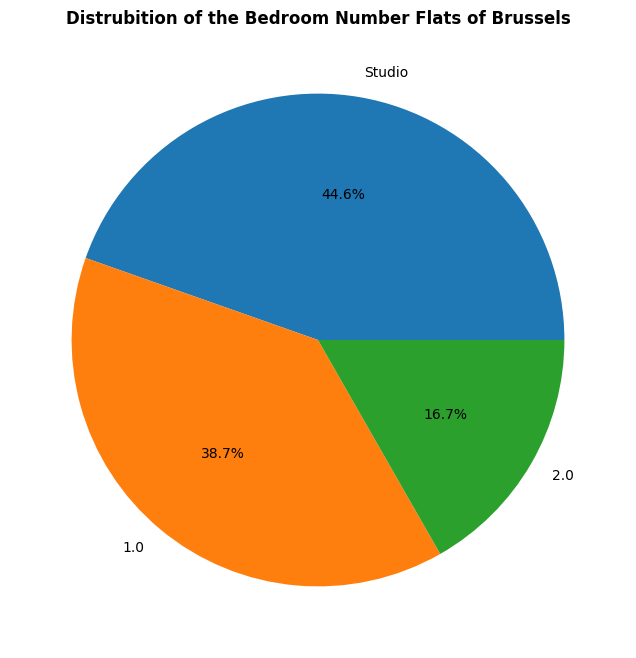

In [30]:
# get the value counts of the 'Bedroom' column
bed_room_counts = df['Bedroom'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bedroom_counts = bed_room_counts[bed_room_counts/len(df) > 0.01]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bedroom_counts, labels=filtered_bedroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bedroom Number Flats of Brussels',weight="bold")

# display the chart
plt.show();


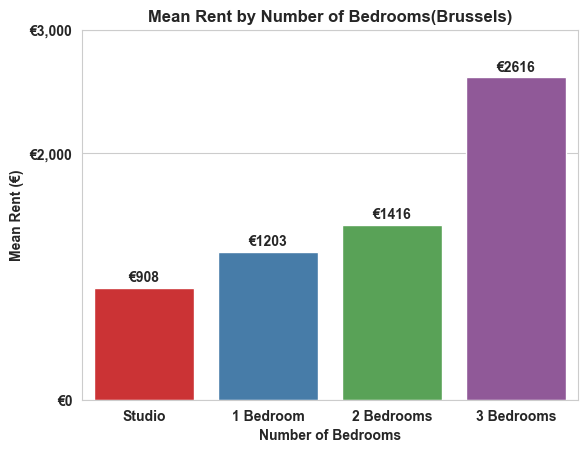

In [31]:
### Calculate mean rent for each group + add expenses ###
studio_mean_rent=df[df['Bedroom'] == "Studio"]['Rent'].mean()
one_bed_mean_rent = df[df['Bedroom'] == 1]['Rent'].mean()
two_bed_mean_rent = df[df['Bedroom'] == 2]['Rent'].mean()
three_bed_mean_rent = df[df['Bedroom'] == 3]['Rent'].mean()

### Create a bar plot ###
sns.set_style("whitegrid")
ax = sns.barplot(x=["Studio",'1 Bedroom', '2 Bedrooms','3 Bedrooms'], y=[studio_mean_rent,one_bed_mean_rent, two_bed_mean_rent,three_bed_mean_rent], palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+50, '€{:.0f}'.format(height), ha="center", weight='bold')

# Format the x and y-axis tick labels
ax.set_xticklabels(["Studio",'1 Bedroom', '2 Bedrooms','3 Bedrooms',], weight='bold')
ax.set_yticks([0, 2000, 3000])
ax.set_yticklabels(['€0', '€2,000', '€3,000'], weight='bold')

# Format the x and y-axis labels
ax.set_xlabel('Number of Bedrooms', weight='bold')
ax.set_ylabel('Mean Rent (€)', weight='bold')

# Set the plot title
ax.set_title('Mean Rent by Number of Bedrooms(Brussels)', weight='bold')

plt.show();